<h1>Preprocessing<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#General-First-Procedures" data-toc-modified-id="General-First-Procedures-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>General First Procedures</a></span><ul class="toc-item"><li><span><a href="#EDA-(Exploratory-Data-Analysis)" data-toc-modified-id="EDA-(Exploratory-Data-Analysis)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>EDA (Exploratory Data Analysis)</a></span></li></ul></li><li><span><a href="#Categorical-features" data-toc-modified-id="Categorical-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Categorical features</a></span><ul class="toc-item"><li><span><a href="#Dummy-variables-(pandas)" data-toc-modified-id="Dummy-variables-(pandas)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dummy variables (pandas)</a></span><ul class="toc-item"><li><span><a href="#Integers-to-categorical-dummy-variables" data-toc-modified-id="Integers-to-categorical-dummy-variables-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Integers to categorical dummy variables</a></span></li></ul></li><li><span><a href="#Dummy-variables-(sklearn)" data-toc-modified-id="Dummy-variables-(sklearn)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dummy variables (sklearn)</a></span></li><li><span><a href="#Practice-dummifying" data-toc-modified-id="Practice-dummifying-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Practice dummifying</a></span></li></ul></li><li><span><a href="#Missing-data" data-toc-modified-id="Missing-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Missing data</a></span><ul class="toc-item"><li><span><a href="#Dropping-Missing-data" data-toc-modified-id="Dropping-Missing-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dropping Missing data</a></span><ul class="toc-item"><li><span><a href="#EXERCISE" data-toc-modified-id="EXERCISE-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>EXERCISE</a></span></li></ul></li><li><span><a href="#Imputing-Missing-data" data-toc-modified-id="Imputing-Missing-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Imputing Missing data</a></span><ul class="toc-item"><li><span><a href="#EXERCISE" data-toc-modified-id="EXERCISE-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>EXERCISE</a></span></li></ul></li></ul></li><li><span><a href="#Centering-&amp;-Scaling" data-toc-modified-id="Centering-&amp;-Scaling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Centering &amp; Scaling</a></span><ul class="toc-item"><li><span><a href="#EXERCISE" data-toc-modified-id="EXERCISE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>EXERCISE</a></span></li></ul></li><li><span><a href="#Automatic-Feature-Selection" data-toc-modified-id="Automatic-Feature-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Automatic Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Univariate-Statstics" data-toc-modified-id="Univariate-Statstics-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Univariate Statstics</a></span></li><li><span><a href="#Model-Based-Feature-Selection" data-toc-modified-id="Model-Based-Feature-Selection-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Model-Based Feature Selection</a></span></li><li><span><a href="#Iterative-Feature-Selection" data-toc-modified-id="Iterative-Feature-Selection-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Iterative Feature Selection</a></span></li></ul></li><li><span><a href="#Polynomial-Features" data-toc-modified-id="Polynomial-Features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Polynomial Features</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import Ridge, LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectPercentile, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
import sklearn

# General First Procedures

## EDA (Exploratory Data Analysis)

In [2]:
# provided datasets in sklearn
dsets = [i for i in dir(datasets) if i.startswith('load_')]
dsets

['load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine']

In [2]:
# loading iris dataset
iris_dset = datasets.load_iris()
iris_dset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# create DF out of feature values for scattermatrix plot
iris_df = pd.DataFrame(data=iris_dset.data, columns=iris_dset.feature_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


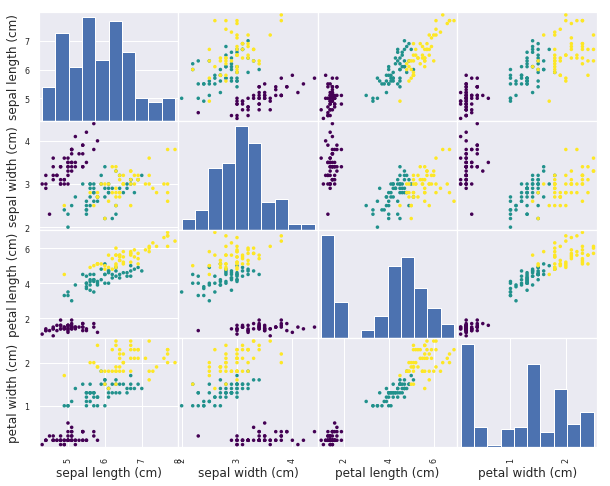

In [5]:
sns.set()
# construct scattermatrix to inspect how features correlate respect to each other
_ = pd.plotting.scatter_matrix(iris_df, figsize=(10, 8),
                               c=iris_dset.target, s=50, marker='.', alpha=1, cmap='viridis')

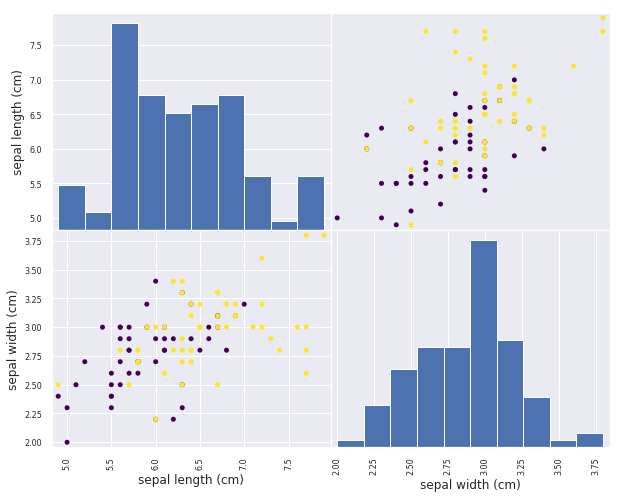

In [6]:
_ = pd.plotting.scatter_matrix(iris_df.iloc[50:,0:2], figsize=(10, 8),
                               c=iris_dset.target[50:], s=100, marker='.', alpha=1, cmap='viridis')

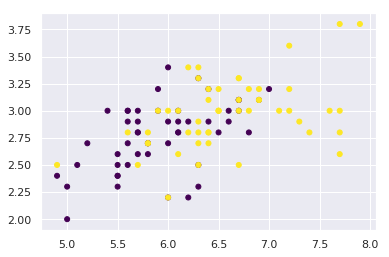

In [7]:
_ = plt.scatter(iris_df.iloc[50:, 0], iris_df.iloc[50:, 1], c=iris_dset.target[50:],
           marker='.', s=100, cmap='viridis')

In [8]:
iris_dset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

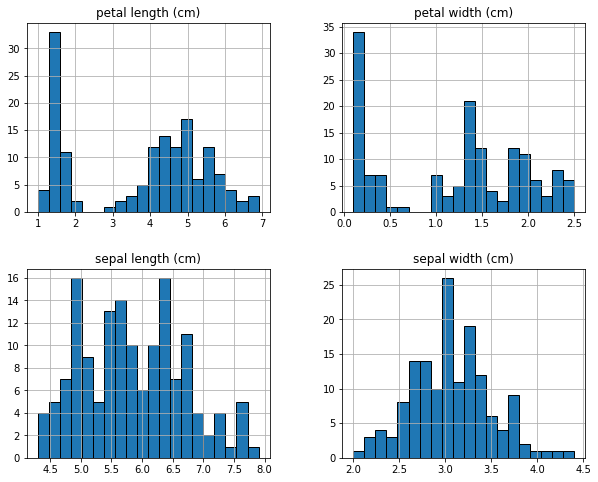

In [7]:
# plotting the data as histograms
iris_df.hist(bins=20, figsize=(10, 8), edgecolor='k')
plt.show()

# Categorical features

 * Scikit-learn does NOT accept categorical features by default, thus these need to be encoded numerically. This process is called converting to dummy variables.

## Dummy variables (pandas)

 * For example:

    0 : Observation was NOT that category
    1 : It was that category

 * In scikit-learn for Python one can use OneHotEncoder() pandas: get_dummies()

In [9]:
auto = pd.read_csv('classification/data/auto.csv', header=0)
print("unique 'origin' values: {}".format(auto.origin.unique()))
auto.head(5)

unique 'origin' values: ['US' 'Asia' 'Europe']


,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


    * Target variable: mpg (miles per gallon)
    * Categorical variable: origin (three possible values: US, Asia, Europe)

In [10]:
auto_dummies = pd.get_dummies(auto)
auto_dummies.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


 * The origin column is split into three independent columns, each cointaing true values ony for their category.  
 * Since we know that 3rd car is not European nor US we can totally delete the 'origin_Asia' column.

In [11]:
auto_dummies = auto_dummies.drop('origin_Asia', axis=1)
auto_dummies.head(3)

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0


 * Encoding categorical data to dummy variables enables us to use that feature as well.
 
 Practice some linear regression on 'mpg'.

In [12]:
X = auto_dummies.drop('mpg', axis=1)
y = auto_dummies.mpg

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ridge = Ridge(alpha=0.5).fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(ridge.predict(X_test), y_test))

# print the R^2 and RMSE score
print("Ridge R^2 = {:.3f}".format(ridge.score(X_test, y_test)))
print("Ridge RMSE = {:.3f}".format(rmse))

Ridge R^2 = 0.735
Ridge RMSE = 3.960


### Integers to categorical dummy variables

* By default, the **get_dummies()** function treats all numbers as continuous in the DF and will not create dummy variables for them.
* Alternatives are: 
    * sklearn's OneHotEncoder (need to specify discrete and continuous vars manually)
    * convert numeric (categorical vars) columns to strings
    * use columns parameter in get_dummies() function to specify columns to be dummified
    
Create demo df with int and str type categorical columns:

In [4]:
# create DF with two categorical columns, but one
# with integers, the other with strings
demo_df = pd.DataFrame({'category_int': [1, 0, 1, 2],
                       'category_str' : ['cat', 'dog', 'dog', 'cat']})
demo_df

,category_int,category_str
0,1,cat
1,0,dog
2,1,dog
3,2,cat


In [9]:
# get_dummies() with default setting converts only string type:
pd.get_dummies(demo_df)

,category_int,category_str_cat,category_str_dog
0,1,1,0
1,0,0,1
2,1,0,1
3,2,1,0


In [10]:
# get_dummies() for both columns
pd.get_dummies(demo_df, columns=['category_int', 'category_str'])

,category_int_0,category_int_1,category_int_2,category_str_cat,category_str_dog
0,0,1,0,1,0
1,1,0,0,0,1
2,0,1,0,0,1
3,0,0,1,1,0


## Dummy variables (sklearn)

In [21]:
encoder = OneHotEncoder()
encoder.fit(demo_df)
encoder.categories_

[array([0, 1, 2], dtype=object), array(['cat', 'dog'], dtype=object)]

In [26]:
encoder.transform(demo_df).toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0.]])

## Practice dummifying

In [13]:
gapmind = pd.read_csv('regression/data/gm_2008_region.csv', header=0)
print("Unique regions: {}".format(gapmind.Region.unique()))
gapmind.head(2)

Unique regions: ['Middle East & North Africa' 'Sub-Saharan Africa' 'America'
 'Europe & Central Asia' 'East Asia & Pacific' 'South Asia']


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa


In [14]:
# drop_first=True argument elminates first categorical column, this case America
gapmind_dummies = pd.get_dummies(gapmind, drop_first=True)
gapmind_dummies.head(1)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.5962,12314.0,129.9049,75.3,29.5,0,0,1,0,0


Let's use Ridge regression and cross-validation

In [15]:
# data
X = gapmind_dummies.drop('life', axis=1)
y = gapmind_dummies.life

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# linear model
ridge = Ridge(alpha=0.5, normalize=True)

# cross-validate
ridge_cv = cross_val_score(ridge, X_train, y_train, cv=10)

# return cross validation scores for R^2
print("R^2 scores: {}".format([round(i, 3) for i in ridge_cv]))
print("\nMean R^2: {:.3f}".format(np.mean(ridge_cv)))

R^2 scores: [0.903, 0.894, 0.866, 0.874, 0.855, 0.772, 0.772, 0.881, 0.905, 0.788]

Mean R^2: 0.851


In [16]:
# determine optimal alpha
alpha_space = np.logspace(-4, 4, 50)
param_grid = {'alpha': alpha_space}

# init the model and normalize features
ridge = Ridge(normalize=True)

# GridSearchCV object
ridge_cv = GridSearchCV(ridge, param_grid=param_grid, cv=10, return_train_score=False, iid=False)

# fit the model
ridge_cv.fit(X_train, y_train)

print("Ridge regression best parameter: {}".format(ridge_cv.best_params_))
print("Ridge regression best score {:.3f}".format(ridge_cv.best_score_))

Ridge regression best parameter: {'alpha': 0.05963623316594643}
Ridge regression best score 0.874


Lets get the results with optimized alpha

In [17]:
# linear model
ridge = Ridge(alpha=0.06, normalize=True)

# cross-validate
ridge_cv = cross_val_score(ridge, X_train, y_train, cv=10)

# return cross validation scores for R^2
print("R^2 scores: {}".format([round(i, 3) for i in ridge_cv]))
print("\nMean R^2: {:.3f}".format(np.mean(ridge_cv)))

R^2 scores: [0.908, 0.906, 0.874, 0.926, 0.866, 0.831, 0.757, 0.93, 0.908, 0.833]

Mean R^2: 0.874


# Missing data

In [19]:
# sample dataset
diab = pd.read_csv('classification/data/diabetes.csv', header=0)
diab.head(3)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [44]:
# check DF info
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are no **NaN** (Not-a-Number) values. Nevertheless, there are many other placeholders for missing values, such as: **-1, 999, 0, ?, -** and so forth. By merely inspecting the diabetes dataset we can see that the 3rd row (index 2) at column 'tricets' has measurement size 0. Skin can't be 0 so we have to deal this as missing data.)

## Dropping Missing data

In [45]:
# assume that triceps, insulin and bmi features cannot be 0
diab.replace({'triceps':0, 'insulin':0, 'bmi':0}, np.nan, inplace=True)
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


Drop all rows that contain NaN-s (missing data)

In [46]:
diab_cleaned = diab.dropna()
print(diab.shape, diab_cleaned.shape)

(768, 9) (393, 9)


In [101]:
print('We lost {:.0f} % of the data by removing NaN-s.'.format(100-(diab_cleaned.shape[0] / diab.shape[0] * 100)))

We lost 49 % of the data by removing NaN-s.


### EXERCISE

Inspect "house-votes-84.csv" dataset and remove missing values

In [161]:
# column names
col_names = ['party', 'infants', 'water', 'budget', 'physician', 'salvador', 'religious', 
             'satellite', 'aid', 'missile', 'immigration', 'synfuels', 'education', 
             'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

house = pd.read_csv('supervised/classification/data/house-votes-84.csv',
                   header=None, names=col_names)
house.head(2)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?


In [162]:
# lets convert 'y' and 'n' to numbers and '?' to nans
house.replace({'n':0, 'y':1, '?': np.nan}, inplace=True)
house.head(2)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [135]:
# '?' represent missing values
house.replace('?', np.nan, inplace=True)

# number of nans
house.isna().sum()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

In [136]:
# lets check how much data we have left if we drop missing values
house_cleaned = house.dropna()
house_cleaned.shape

(232, 17)

In [137]:
print("Lost {:.0f}% of data after cleaning.".format(100-(house_cleaned.shape[0] / house.shape[0] *100)))

Lost 47% of data after cleaning.


## Imputing Missing data

To make an educated guess for that missing values. Commonly: use the mean of the non-missing values:

In [67]:
diab.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [82]:
X = diab.drop('diabetes', axis=1)
y = diab.diabetes

# imputer object
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)

print(X.iloc[0,:].values)
X = imp_mean.transform(X)
print(np.round(X[:1], 3))

[  6.    148.     72.     35.        nan  33.6     0.627  50.   ]
[[  6.    148.     72.     35.    155.548  33.6     0.627  50.   ]]


### EXERCISE

Lets continue with the house-vote-84 dataset. We have the DF in the form of:

In [163]:
house.head(3)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [164]:
# lets imbute NaNs based on most frequnt of its column
X = house.drop('party', axis=1).values
y = house.party.values

# construct the imputer
house_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
house_imp.fit(X)

print(X[0,:])
X = house_imp.transform(X)
print(X[0,:])

[ 0.  1.  0.  1.  1.  1.  0.  0.  0.  1. nan  1.  1.  1.  0.  1.]
[0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]


# Centering & Scaling

In [166]:
redwine = pd.read_csv('classification/data/winequality-red.csv', header=0, sep=';')
redwine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [167]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Why scale the data? 
 * Here 'total sulfur dioxid' ranges from 6 to 289. 
 * Many models use some form of distance to inform them. 
 * Example: k-NN model uses distance explicitly when making predicitions. 
 * We want features to be on siimilar scale. Otherwise a feature with high std can dominate too much.
 * Thus normalizing is used (scaling, centering).
 
##### Ways to scale data
 * **Standardization**: From each sample $x_i$ subtract the feature mean and divide by feature variance ($std^2$). Feature(s) are centered around zero and have variance one
$$\text{Standardization} = \frac{x_i - \bar{x}}{var(x)}$$

 * **Normalization**: From each sample $x_i$ subtract the minimum and divide by the range of the data. In such a way the data is normalized having max value 1 and min value 0. Can be normalized as [-1, 1] as well.
 
$$\text{Normalization} = \frac{x_i - min(x)}{max(x) - min(x)} $$

In [176]:
X = redwine.drop('quality', axis=1).values
y = redwine.quality.values

# standardizing in sklearn
X_scaled = sklearn.preprocessing.scale(X)

print('Features mean: {:.3f}'.format(np.mean(X)))
print('Features std: {:.3f}'.format(np.std(X)))
print('\nScaled mean: {:.3f}'.format(np.mean(X_scaled)))
print('Scaled std: {:.3f}'.format(np.std(X_scaled)))

Features mean: 8.134
Features std: 16.727

Scaled mean: 0.000
Scaled std: 1.000


## EXERCISE

Let's compare the means and std of scaled and unscaled data.

In [171]:
whitewine = pd.read_csv('classification/data/white-wine.csv', header=0)
whitewine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [173]:
# if quality <= 5 we assign it to 0 and else 1
whitewine.quality = whitewine.quality.apply(lambda x: 0 if x <= 5 else 1)
whitewine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,1


In [177]:
X = whitewine.drop('quality', axis=1).values
y = whitewine.quality.values

# standardizing features
X_scaled = sklearn.preprocessing.scale(X)

print('Features mean: {:.3f}'.format(np.mean(X)))
print('Features std: {:.3f}'.format(np.std(X)))
print('\nScaled mean: {:.3f}'.format(np.mean(X_scaled)))
print('Scaled std: {:.3f}'.format(np.std(X_scaled)))

Features mean: 18.433
Features std: 41.545

Scaled mean: 0.000
Scaled std: 1.000


# Automatic Feature Selection

* **Feature-engineering**: Adding features to the original features by doing some kind of transformation with each feature or combination of features ($x^2$, $\log(x)$, $x_1*x_2$).
* With high-dimensional data it would be wize to select only the most useful features and discard others.
* Feature goodness strategies:
    * **univariate statistics**
    * **model-based selection**
    * **iterative selection**
* These methods apply to <font color='green'>**SUPERVISED**</font> methods only.
* Split data to training and testing and fit the feature selection only on the training data.

## Univariate Statstics

* Each feature is **individually** used on target data. 
* Highest confidences are selected (based on some threshold)
* In *sklearn* a **test type** and **method** must be chosen to discard features:
    * **f_classif** for *classification*
    * **f_regression** for *regression*
* Method: **p-values** (measure (probability) of the strength <font color='red'>**AGAINST**</font> 0-hypothesis) provided by the test. If our null-hypothesis states '*feature has no effect on target*' and we obtain small p-value (0.003) it would suggest that we should keep the feature since the probability of the siginificance of the feature being that high purely on chance is 0.3%. More than 3 std away from the mean. 
* Threshold can be set by:
    * Number of features to keep **SelectkBest**
    * Fraction of features to keep **SelectPercentile**
    
Apply some noise to cancer dataset and use SelectPercentile univariate statistics on data:

In [28]:
cancer = datasets.load_breast_cancer()
cancer.data.shape

(569, 30)

In [29]:
# we have originally 30 features, lets add 50 noise features
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

# select 50% of the best descriptive features
select = SelectPercentile(percentile=50).fit(X_train, y_train)

# transform the training and test data and select only half of the features
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

print('Original data shape: {}'.format(X_w_noise.shape))
print('Selected data shape: {}'.format(X_train_selected.shape))

Original data shape: (569, 80)
Selected data shape: (284, 40)


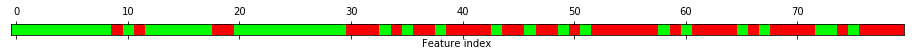

In [30]:
# see which features were selected with "get_support" method
mask = select.get_support()

# green correspond to selected and red to not elected features
lcmap = ListedColormap(['#FF0000', '#00FF00'])

plt.matshow(mask.reshape(1, -1), cmap=lcmap)
plt.xlabel('Feature index')
plt.yticks(())
plt.show()

Most selected features are from the first 30 original features, but as we included noise as well we got noise features also. Some noisy features are preferred over original ones.

Lets compare LogisiticRegression performance on all the 80 features vs selcted 40:

In [34]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
print('Score with all 80 features: {:.3f}'.format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print('Score with selected 40 features: {:.3f}'.format(lr.score(X_test_selected, y_test)))

Score with all 80 features: 0.930
Score with selected 40 features: 0.940


Univariate Statistics is useful, when:
* the number of features for building a model is infeasible
* if is suspected that many features are completely uninformative

## Model-Based Feature Selection

* supervised model is used to judege the importance of the features
* the model that selects the features does not have to be the same for final data modeling
* the feature selection model must provide some measre of importances for ranking the features
* *Decision tree* based models provide a **feature_importances_** attribute
* *Linear models* coefficients (absolute value) capture feature importances 
* *Linear models* with L1 penalty learn sparse coefficents and use only small subset of them
* Model-based selection considers all features at once and thus can capture **interactions** (if model captures them)
* Use **SelectFromModel** transformer

In [38]:
# use random forrest classifier with 100 trees
select = SelectFromModel(estimator=RandomForestClassifier(
    n_estimators=100, random_state=42), threshold='median')

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('Original data shape: {}'.format(X_train.shape))
print('Selected data shape: {}'.format(X_train_l1.shape))

Original data shape: (284, 80)
Selected data shape: (284, 40)


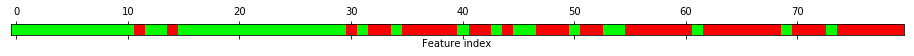

In [39]:
# selected features
mask = select.get_support()

plt.matshow(mask.reshape(1, -1), cmap=lcmap)
plt.yticks(())
plt.xlabel('Feature index')
plt.show()

All but 2 original features were selected.Lets check the performance:

In [42]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(solver='liblinear').fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('LogisiticRegression on selected data: {:.3f}'.format(score))

LogisiticRegression on selected data: 0.951


This results in slightly better model.

## Iterative Feature Selection

* Series of models are built with varying numbers of features
* Two strategies:
    * Start with 0 features and add 1 by 1 until certain criterion
    * Start from max features and remove 1 by 1 until certain criterion
* Computationally expensive
* One such method is: **recursive feature elimination (RFE)**

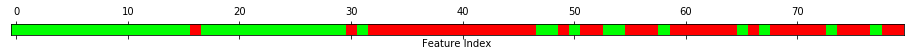

In [44]:
select = RFE(estimator=RandomForestClassifier(
    n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)

# visulize selected features
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap=lcmap)
plt.yticks(())
plt.xlabel('Feature Index')
plt.show()

Optained even better feature selection, yet it took longer time. Let's feed these selected features into LogistiCregression:

In [45]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(solver='liblinear').fit(
    X_train_rfe, y_train).score(X_test_rfe, y_test)

print('LogisiticRegression score: {:.3f}'.format(score))

LogisiticRegression score: 0.951


# Polynomial Features

Let's say we have following 1-feature 100-rows synthetic data:

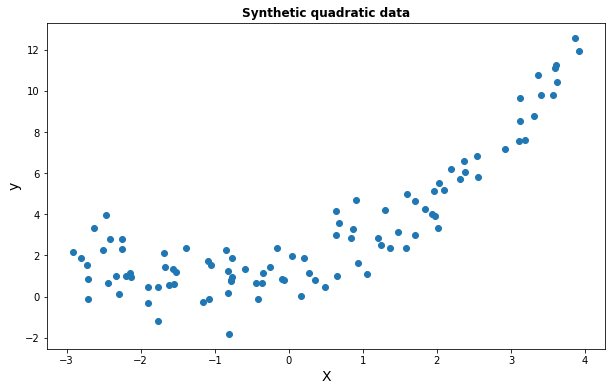

In [5]:
X = 7 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 1 + np.random.randn(100, 1)

plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Synthetic quadratic data', weight='bold')
plt.show()

Seemingly, this dataset is not linear. We can engineer $X^2$ feature of $X$ in order to capture this polynomial trend.

In [7]:
# init transformator
poly_f = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_f.fit_transform(X)
X[0], X_poly[0]

(array([-0.25923481]), array([-0.25923481,  0.06720269]))

Lets fit LinearRegression on new dataset containing $X$ and $X^2$ features.

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print('Intercept: {:.2f}'.format(lin_reg.intercept_[0]))
print('X^2: {:.2f}\nX: {:.2f}'.format(lin_reg.coef_[0][1],
                                      lin_reg.coef_[0][0]))

Intercept: 1.21
X^2: 0.45
X: 0.95


We had data with coefficients:

$$y=0.5X^2 + X + (1 + noise)$$

We predicted coefficients:

$$y=0.45X^2 + 0.95X + 1.21$$

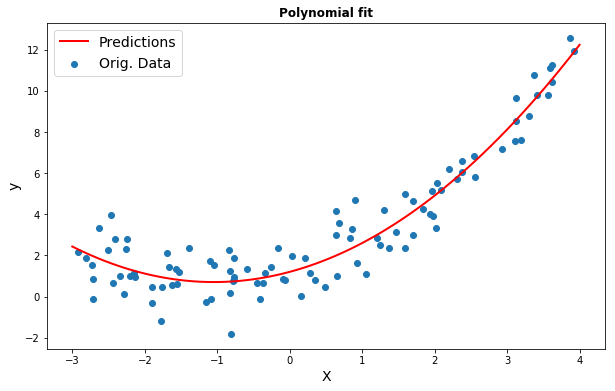

In [21]:
X_new = np.linspace(-3, 4, 100).reshape(100, 1)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Orig. Data')
plt.plot(X_new, y_new, 'r-', label='Predictions', lw=2)
plt.title('Polynomial fit', weight='bold')
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.show()

## Summary

* When unsure which features to use automatic feature selection might be helpful
* Results in more interpretable models
* In real-world problems feature selection is unlikely to provide large gains in performance